In [1]:
!pip install boto3
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO

In [4]:
def detect_labels(photo, bucket):
    # Create a Rekognition client
    client = boto3.client('rekognition')

    # Detect labels in the photo
    response = client.detect_labels(
        Image={'S3Object': {'Bucket': bucket, 'Name': photo}},
        MaxLabels=10)

    # Print detected labels
    print('Detected labels for ' + photo)
    print()
    for label in response['Labels']:
        print("Label:", label['Name'])
        print("Confidence:", label['Confidence'])
        print()

    # Load the image from S3
    s3 = boto3.resource('s3')
    obj = s3.Object(bucket, photo)
    img_data = obj.get()['Body'].read()
    img = Image.open(BytesIO(img_data))

    # Display the image with bounding boxes
    plt.imshow(img)
    ax = plt.gca()
    for label in response['Labels']:
        for instance in label.get('Instances', []):
            bbox = instance['BoundingBox']
            left = bbox['Left'] * img.width
            top = bbox['Top'] * img.height
            width = bbox['Width'] * img.width
            height = bbox['Height'] * img.height
            rect = patches.Rectangle((left, top), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            label_text = label['Name'] + ' (' + str(round(label['Confidence'], 2)) + '%)'
            plt.text(left, top - 2, label_text, color='r', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
    plt.show()

    return len(response['Labels'])

Detected labels for OIP.jpeg

Label: Adult
Confidence: 99.19584655761719

Label: Female
Confidence: 99.19584655761719

Label: Person
Confidence: 99.19584655761719

Label: Woman
Confidence: 99.19584655761719

Label: Boy
Confidence: 98.04853057861328

Label: Child
Confidence: 98.04853057861328

Label: Male
Confidence: 98.04853057861328

Label: Man
Confidence: 94.71556854248047

Label: Shoe
Confidence: 87.63688659667969

Label: Pilates
Confidence: 86.05648040771484



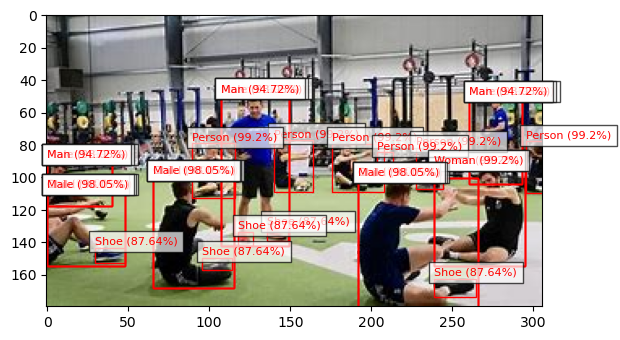

Labels detected: 10


In [6]:
def main():
    photo = 'OIP.jpeg'
    bucket = 'aws-project-rekognition-08092024'
    label_count = detect_labels(photo, bucket)
    print("Labels detected:", label_count)

if __name__ == "__main__":
    main()